## Probability of Successful Attack (Contest Success Function)

We assume the CSF to be a ratio function of the form:
```math
P_i(T_i, G_i) = \frac{\beta T_i}{\beta T_i + \alpha G_i + A_i}
```
where:

- $P_i$ is the probability of a successful attack on target $i$.
- $T_i$ is the defender's investment in target $i$.
- $G_i$ is the attacker's investment in target $i$.
- $A_i$ is the inherent defence level of target $i$.
- $\alpha$ and $\beta$ are constants that determine the sensitivity of the function to the defender's and attacker's investments, respectively.

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import time

def prob_success(alpha, beta, Ti, Gi, Ai):
    "Probability of successful attack on target i"
    return (beta *  Ti) / (beta * Ti + alpha * Gi + Ai)

## Figure 1 - Illustration of a Probability of Successful Attack Function

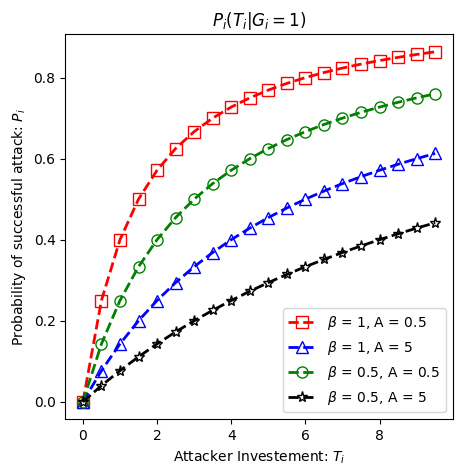

In [2]:
def plot_figure1():
    plt.figure(num=1,figsize=(5,5))
    Tis = np.arange(0,10,0.5)
    Gi = 1
    alpha = 1
    Pi_1_05 = np.array([prob_success(alpha=alpha, beta=1, Ti=Ti, Gi=Gi, Ai=0.5) for Ti in Tis])
    plt.plot(Tis, Pi_1_05, 'rs--', markersize=8, linewidth=2, label=r'$\beta$ = 1, A = 0.5', fillstyle='none')

    Pi_1_5 = np.array([prob_success(alpha=alpha, beta=1, Ti=Ti, Gi=Gi, Ai=5) for Ti in Tis])
    plt.plot(Tis, Pi_1_5, 'b^--', markersize=8, linewidth=2, label=r'$\beta$ = 1, A = 5', fillstyle='none')

    Pi_05_05 = np.array([prob_success(alpha=alpha, beta=0.5, Ti=Ti, Gi=Gi, Ai=0.5) for Ti in Tis])
    plt.plot(Tis, Pi_05_05, 'go--', markersize=8, linewidth=2, label=r'$\beta$ = 0.5, A = 0.5', fillstyle='none')

    Pi_05_5 = np.array([prob_success(alpha=alpha, beta=0.5, Ti=Ti, Gi=Gi, Ai=5) for Ti in Tis])
    plt.plot(Tis, Pi_05_5, 'k*--', markersize=8, linewidth=2, label=r'$\beta$ = 0.5, A = 5', fillstyle='none')
    plt.legend()
    plt.title(r'$P_i(T_i | G_i = 1)$')
    plt.xlabel(r'Attacker Investement: $T_i$')
    plt.ylabel(r'Probability of successful attack: $P_i$')

plot_figure1()

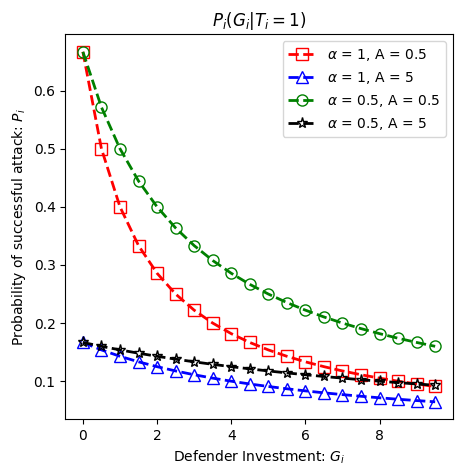

In [3]:
def plot_figure2():
    plt.figure(num=1,figsize=(5,5))
    Gis = np.arange(0,10,0.5)
    Ti = 1
    beta = 1
    Pi_1_05 = np.array([prob_success(alpha=1, beta=beta, Ti=Ti, Gi=Gi, Ai=0.5) for Gi in Gis])
    plt.plot(Gis, Pi_1_05, 'rs--', markersize=8, linewidth=2, label=r'$\alpha$ = 1, A = 0.5', fillstyle='none')

    Pi_1_5 = np.array([prob_success(alpha=1, beta=beta, Ti=Ti, Gi=Gi, Ai=5) for Gi in Gis])
    plt.plot(Gis, Pi_1_5, 'b^--', markersize=8, linewidth=2, label=r'$\alpha$ = 1, A = 5', fillstyle='none')

    Pi_05_05 = np.array([prob_success(alpha=0.5, beta=beta, Ti=Ti, Gi=Gi, Ai=0.5) for Gi in Gis])
    plt.plot(Gis, Pi_05_05, 'go--', markersize=8, linewidth=2, label=r'$\alpha$ = 0.5, A = 0.5', fillstyle='none')

    Pi_05_5 = np.array([prob_success(alpha=0.5, beta=beta, Ti=Ti, Gi=Gi, Ai=5) for Gi in Gis])
    plt.plot(Gis, Pi_05_5, 'k*--', markersize=8, linewidth=2, label=r'$\alpha$ = 0.5, A = 5', fillstyle='none')
    plt.legend()
    plt.title(r'$P_i(G_i | T_i = 1)$')
    plt.xlabel(r'Defender Investment: $G_i$')
    plt.ylabel(r'Probability of successful attack: $P_i$')

plot_figure2()

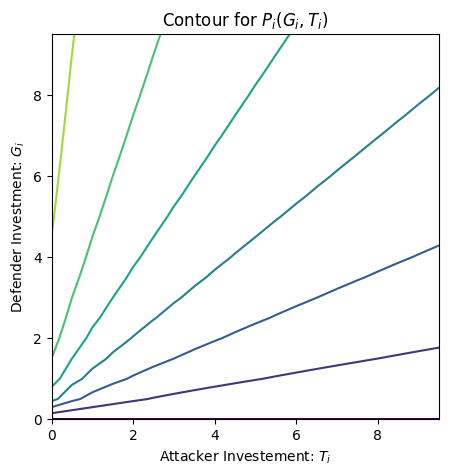

In [4]:
def plot_figure3():
    plt.figure(num=1,figsize=(5,5))
    Gis = np.arange(0,10,0.5)
    Tis = np.arange(0, 10, 0.5)
    beta = 1
    alpha = 1
    Ai = 0.5
    Pis = np.array([[prob_success(alpha=alpha, beta=beta, Ti=Ti, Gi=Gi, Ai=Ai) for Gi in Gis] for Ti in Tis])
    X, Y = np.meshgrid(Gis, Tis)
    plt.contour(X, Y, Pis)
    plt.title(r'Contour for $P_i(G_i, T_i)$')
    plt.xlabel(r'Attacker Investement: $T_i$')
    plt.ylabel(r'Defender Investment: $G_i$')

plot_figure3()

## Figure 2

## Contour Plot of the Defender's Total Losses in a Two-Target Case and the Equilibrium Solutions of Both the Sequential and Simultaneous Move Games

In [5]:
from defender_model import defender_model
from attacker_model import attacker_model

# Parameters
n = 2 # Number of targets
T_budget = 5 # Attacker's investment (Million USD)
G_budget = 30 # Defender's Investment (Million USD)

B = [50, 100] # Attacker's benefit from a successful attack on target 1 (Million USD)
# D = [150, 30] # Defender's target evaluation for target 1 (Million USD)
D = [30, 150] # To replicate exact results as the paper

beta, alpha, A = 1, 1, 0.1

Solution: {G1: 22.6847430583217, G2: 7.31525694167834, lambda_g: 0.676841372758829, mug1: 0, mug2: 0}
Solution: {T1: 5.00000000000000, T2: 0, lambda_t: 1.86876562461325, mut1: 0, mut2: 4.75375093167814}


In [6]:
# Obtaining the data for the graphs

attackers_best_response = []
for G1 in np.arange(0,G_budget+0.5,0.5):
    # start_time = time.time()  # Start timer
    G2 = G_budget - G1
    G_list = [G1, G2]
    solution = attacker_model(n = 2,
                              T_budget=T_budget,
                              alpha=alpha,
                              beta=beta,
                              A=A,
                              B=B,
                              G_list=G_list)
    # elapsed_time = time.time() - start_time  # End timer
    solution = {'G1' : G1, 'G2' : G2} | solution
    attackers_best_response.append(solution)
    # print(f"G1 = {G1:.2f}, Time taken = {elapsed_time:.4f} seconds")
attackers_best_response = pd.DataFrame(attackers_best_response)
attackers_best_response.to_excel('attackers_best_response.xlsx')

In [7]:
defenders_best_response = []
for T1 in np.arange(0,T_budget+0.25,0.25):
    # start_time = time.time()  # Start timer
    T2 = T_budget - T1
    T_list = [T1, T2]
    solution = defender_model(n = 2,
                              G_budget=G_budget,
                              alpha=alpha,
                              beta=beta,
                              A=A,
                              D=D,
                              T_list=T_list)
    # elapsed_time = time.time() - start_time  # End timer
    solution = {'T1': T1, 'T2': T2} | solution
    defenders_best_response.append(solution)
    # print(f"T1 = {T1:.2f}, Time taken = {elapsed_time:.4f} seconds")
defenders_best_response = pd.DataFrame(defenders_best_response)
defenders_best_response.to_excel('defenders_best_response.xlsx')

In [8]:
# Simulatenous game problem (using LINGO)
T_list =       [2.412500, 2.587500]
G_list =       [8.103487, 21.89651]

# Defender's total losses sum(Bi * Pi)
print("Defender's total losses (in Millions USD):", sum([D[i] * prob_success(alpha,beta,T_list[i], G_list[i], A) for i in range(n)]))

Defender's total losses (in Millions USD): 22.605248941525765


In [9]:
# Sequential game problem (using LINGO)
T_list =         [3.277294, 1.722706]
G_list =         [5.509056, 24.49094]

# Defender's total losses sum(Bi * Pi)
print("Defender's total losses (in Millions USD):", sum([D[i] * prob_success(alpha,beta,T_list[i], G_list[i], A) for i in range(n)]))

Defender's total losses (in Millions USD): 20.8842514897213


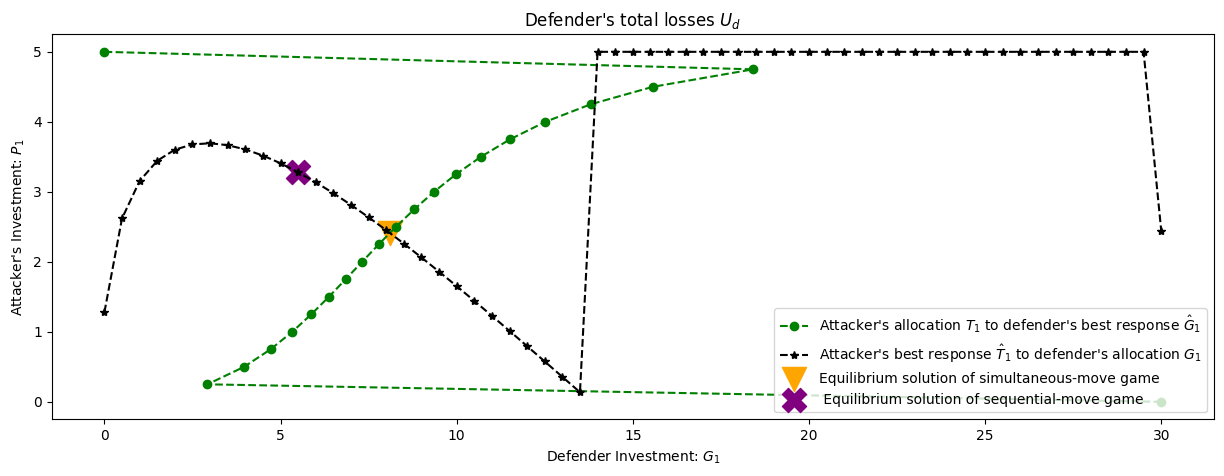

In [10]:
plt.figure(figsize = (15,5))

# plt.plot(defenders_best_response[defenders_best_response.columns[3]], defenders_best_response.T2, 'go--') # G2 T2 plot
plt.plot(defenders_best_response[defenders_best_response.columns[2]], defenders_best_response.T1, 'go--', label=r"Attacker's allocation $T_1$ to defender's best response $\hat G_1$") # G1 T1 plot
plt.plot(attackers_best_response.G1, attackers_best_response[attackers_best_response.columns[2]], 'k*--', label=r"Attacker's best response $\hat T_1$ to defender's allocation $G_1$") # G1 T1 plot

# Simultaneous equilibrium point
plt.scatter([8.103487], [2.412500], marker='v', s=300, c='orange', label='Equilibrium solution of simultaneous-move game')
# Sequential equilibrium point
plt.scatter([5.509056], [3.277294], marker='X', s=300, c='purple', label=' Equilibrium solution of sequential-move game')

plt.title(r"Defender's total losses $U_d$")
plt.xlabel(r'Defender Investment: $G_1$')
plt.ylabel(r"Attacker's Investment: $P_1$")
plt.legend();